# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [90]:
# WRITE YOUR CODE HERE
set.seed(2024)

sample_size = 100 # n = 100
b0 = 10
b1 = 15
x = rnorm(sample_size)
b2 = 20
x_2 = x^2
b3 = 25
x_3 = x^3
error = rnorm(sample_size)
y = b0 + b1*x + b2*x_2 + b3*x_3 + error

dat <- data.frame(x=x, y=y, error=error)
head(dat)

,x,y,error
,<dbl>,<dbl>,<dbl>
1,0.9819694,69.895423,2.2086617
2,0.4687150,24.439079,0.4401328
3,-0.1079713,9.625284,1.0431660
4,-0.2128782,7.597671,0.1256767
5,1.1580985,91.760878,-1.2652495
6,1.2923548,117.124968,0.3743600


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [91]:
# WRITE YOUR CODE HERE
#install.packages("leaps")
library(leaps)
#?regsubsets
# perform subset select with y ~ x...x^10
regfit.full = regsubsets(y ~ poly(x, 10, raw=TRUE), data=dat, nvmax = 10) 
summary =  summary(regfit.full)
summary

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = TRUE), data = dat, nvmax = 10)
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  "*"                      "*"                     
4  ( 1 )  "*"                      "*"         

In [92]:
# # Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# # Otherwise you can either delete this cell or leave it blank.

# ```
# # paste here
# Subset selection object
# Call: regsubsets.formula(y ~ poly(x, 10, raw = TRUE), data = dat, nvmax = 10)
# 10 Variables  (and intercept)
#                           Forced in Forced out
# poly(x, 10, raw = TRUE)1      FALSE      FALSE
# poly(x, 10, raw = TRUE)2      FALSE      FALSE
# poly(x, 10, raw = TRUE)3      FALSE      FALSE
# poly(x, 10, raw = TRUE)4      FALSE      FALSE
# poly(x, 10, raw = TRUE)5      FALSE      FALSE
# poly(x, 10, raw = TRUE)6      FALSE      FALSE
# poly(x, 10, raw = TRUE)7      FALSE      FALSE
# poly(x, 10, raw = TRUE)8      FALSE      FALSE
# poly(x, 10, raw = TRUE)9      FALSE      FALSE
# poly(x, 10, raw = TRUE)10     FALSE      FALSE
# 1 subsets of each size up to 10
# Selection Algorithm: exhaustive
#           poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
# 1  ( 1 )  " "                      " "                     
# 2  ( 1 )  " "                      "*"                     
# 3  ( 1 )  "*"                      "*"                     
# 4  ( 1 )  "*"                      "*"                     
# 5  ( 1 )  "*"                      "*"                     
# 6  ( 1 )  "*"                      "*"                     
# 7  ( 1 )  "*"                      "*"                     
# 8  ( 1 )  "*"                      "*"                     
# 9  ( 1 )  "*"                      "*"                     
# 10  ( 1 ) "*"                      "*"                     
#           poly(x, 10, raw = TRUE)3 poly(x, 10, raw = TRUE)4
# 1  ( 1 )  "*"                      " "                     
# 2  ( 1 )  "*"                      " "                     
# 3  ( 1 )  "*"                      " "                     
# 4  ( 1 )  "*"                      "*"                     
# 5  ( 1 )  "*"                      " "                     
# 6  ( 1 )  "*"                      " "                     
# 7  ( 1 )  "*"                      " "                     
# 8  ( 1 )  "*"                      " "                     
# 9  ( 1 )  "*"                      " "                     
# 10  ( 1 ) "*"                      "*"                     
#           poly(x, 10, raw = TRUE)5 poly(x, 10, raw = TRUE)6
# 1  ( 1 )  " "                      " "                     
# 2  ( 1 )  " "                      " "                     
# 3  ( 1 )  " "                      " "                     
# 4  ( 1 )  " "                      " "                     
# 5  ( 1 )  " "                      " "                     
# 6  ( 1 )  "*"                      " "                     
# 7  ( 1 )  "*"                      " "                     
# 8  ( 1 )  "*"                      " "                     
# 9  ( 1 )  "*"                      "*"                     
# 10  ( 1 ) "*"                      "*"                     
#           poly(x, 10, raw = TRUE)7 poly(x, 10, raw = TRUE)8
# 1  ( 1 )  " "                      " "                     
# 2  ( 1 )  " "                      " "                     
# 3  ( 1 )  " "                      " "                     
# 4  ( 1 )  " "                      " "                     
# 5  ( 1 )  " "                      "*"                     
# 6  ( 1 )  "*"                      " "                     
# 7  ( 1 )  "*"                      " "                     
# 8  ( 1 )  "*"                      "*"                     
# 9  ( 1 )  "*"                      "*"                     
# 10  ( 1 ) "*"                      "*"                     
#           poly(x, 10, raw = TRUE)9 poly(x, 10, raw = TRUE)10
# 1  ( 1 )  " "                      " "                      
# 2  ( 1 )  " "                      " "                      
# 3  ( 1 )  " "                      " "                      
# 4  ( 1 )  " "                      " "                      
# 5  ( 1 )  " "                      "*"                      
# 6  ( 1 )  "*"                      " "                      
# 7  ( 1 )  "*"                      "*"                      
# 8  ( 1 )  "*"                      "*"                      
# 9  ( 1 )  "*"                      "*"                      
# 10  ( 1 ) "*"                      "*"                      
# ```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

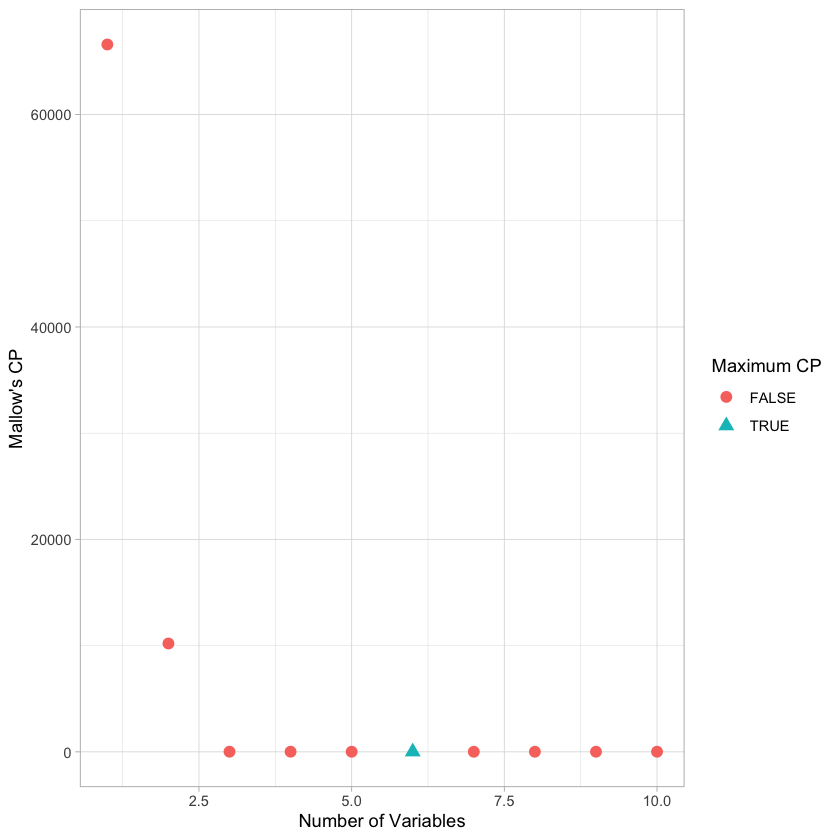

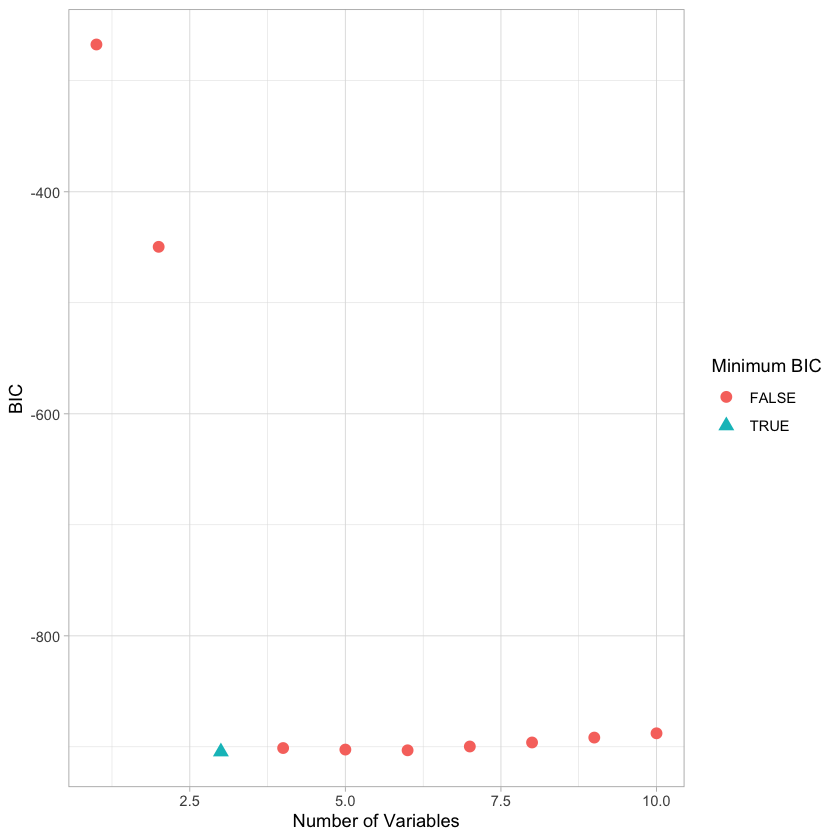

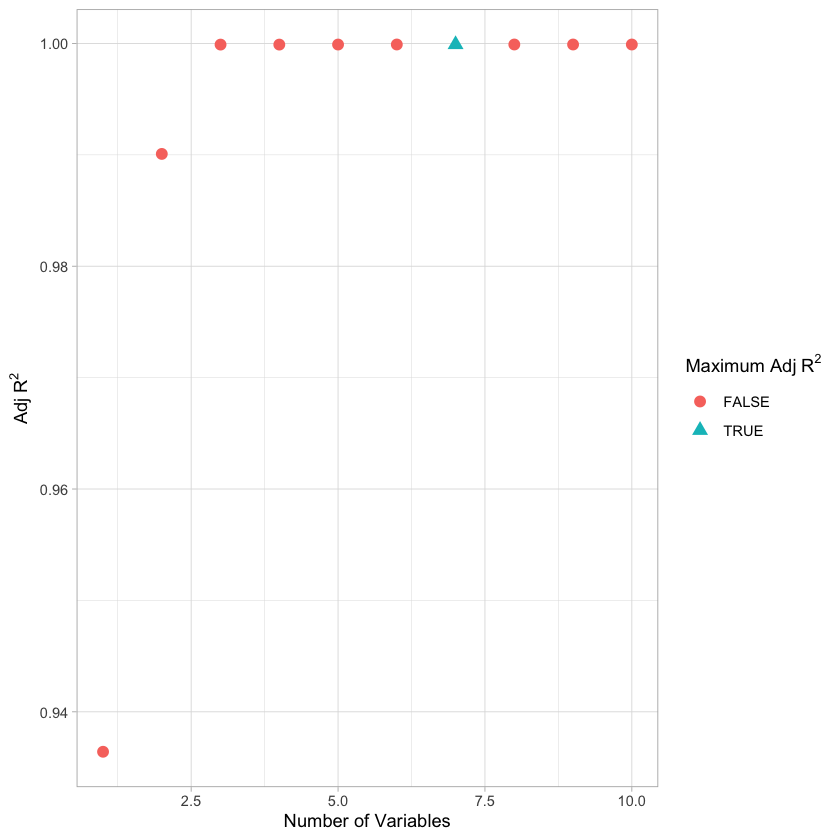

In [93]:
# WRITE YOUR CODE HERE
library(tidyverse)

# Make a vector that lists the number of variables in sequence
numvar = 1:length(summary$rss)

# Starting point for an indicator that marks the best model choice for each metric.
allfalse = rep(FALSE,length(summary$rss))

#plot Mallow's CP
#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# plot BIC
#bic
bic.df <- data.frame(numvar = numvar,bic <- summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

# plot adjusted R^2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)


In [94]:
# identify which model has the best bias-adjusted fit
paste("BIC:", which.min(summary$bic)) 
paste("Adj R^2:", which.max(summary$adjr2))
paste("CP:", which.min(summary$cp))

#report the coefficients
# Get the names of the variables in the best model (model 3)
names(which(summary$which[3, ]))

# Fit best model
best_model_fit <- lm(y ~ I(x^1) + I(x^2) + I(x^3), data=dat)

# Report the coefficients
coef(best_model_fit)


[1] "BIC: 3"

[1] "Adj R^2: 7"

[1] "CP: 6"

[1] "(Intercept)"              "poly(x, 10, raw = TRUE)1"
[3] "poly(x, 10, raw = TRUE)2" "poly(x, 10, raw = TRUE)3"

(Intercept)      I(x^1)      I(x^2)      I(x^3) 
   10.04912    14.92924    20.11987    25.06509

> *Write your response here* 

> The best model is the third model with x, x1, and x2 as predictors because it has the lowest BIC with the least number of features among different measures. 

> The coefficients are 14.9, 20.1, and 25.1. 

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [95]:
# WRITE YOUR CODE HERE
select_model <- function(method) {
    regfit = regsubsets(y~ poly(x, 10, raw=TRUE), 
    data=dat, nvmax=10, method = method)

    summary = summary(regfit)

    return (summary)
}

forward_summary

Subset selection object
Call: select_model(method = "forward")
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  "*"                      "*"                     
4  ( 1 )  "*"                      "*"                     
5  ( 1 )  "*"                

In [96]:
#install.packages("ggpubr")
library(ggpubr)

[1] "BIC: 3"
[1] "Adj R^2: 8"
[1] "CP: 6"
[1] "(Intercept)"              "poly(x, 10, raw = TRUE)1"
[3] "poly(x, 10, raw = TRUE)2" "poly(x, 10, raw = TRUE)3"
(Intercept)      I(x^1)      I(x^2)      I(x^3) 
   10.04912    14.92924    20.11987    25.06509 


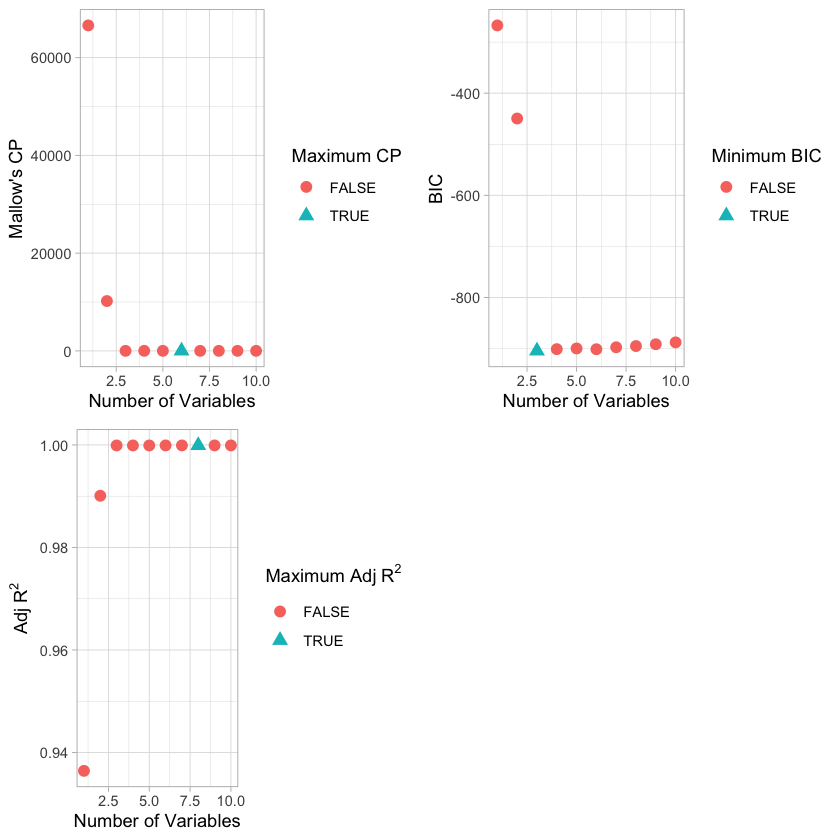

In [97]:
plot_metrics <- function(summary) {
    # Make a vector that lists the number of variables in sequence
    numvar = 1:length(summary$rss)

    # Starting point for an indicator that marks the best model choice for each metric.
    allfalse = rep(FALSE,length(summary$rss))

    par(mfrow=c(2,2))

    #plot Mallow's CP
    #mallow's cp
    cp.df <- data.frame(numvar = numvar, cp <- summary$cp, mincp <- allfalse)
    cp.df$mincp[which.min(summary$cp)] <- TRUE
    cp_plot <- ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
        geom_point(size=3) + theme_light() + 
        labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

    # plot BIC
    #bic
    bic.df <- data.frame(numvar = numvar,bic <- summary$bic, minbic <- allfalse)
    bic.df$minbic[which.min(summary$bic)] <- TRUE
    bic_plot <- ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
        geom_point(size=3) + theme_light() + 
        labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

    # plot adjusted R^2
    adjr2.df <- data.frame(numvar = numvar, adjr2 <- summary$adjr2, maxadjr2 <- allfalse)
    adjr2.df$maxadjr2[which.max(summary$adjr2)] <- TRUE
    r2_plot <- ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
        geom_point(size=3) + theme_light() + 
        labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)
    
    return (ggarrange(cp_plot, bic_plot, r2_plot))
}

get_text_detail <- function(summary){
        # identify which model has the best bias-adjusted fit
    print(paste("BIC:", which.min(summary$bic)))
    print(paste("Adj R^2:", which.max(summary$adjr2)))
    print(paste("CP:", which.min(summary$cp)))

    #report the coefficients
    # Get the names of the variables in the best model (model 3)
    print(paste( names(which(summary$which[3, ])) ))

    # Fit best model
    best_model_fit <- lm(y ~ I(x^1) + I(x^2) + I(x^3), data=dat)

    # Report the coefficients
    print(coef(best_model_fit))

}

plot_metrics(forward_summary)
get_text_detail(forward_summary)

In [98]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


b) Backwards stepwise selection:

In [ ]:
# WRITE YOUR CODE HERE
backward_summary = select_model(method = "backward")
backward_summary


Subset selection object
Call: select_model(method = "backward")
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  "*"                      "*"                     
4  ( 1 )  "*"                      "*"                     
5  ( 1 )  "*"              

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here


```

[1] "BIC: 3"
[1] "Adj R^2: 7"
[1] "CP: 6"
[1] "(Intercept)"              "poly(x, 10, raw = TRUE)1"
[3] "poly(x, 10, raw = TRUE)2" "poly(x, 10, raw = TRUE)3"
(Intercept)      I(x^1)      I(x^2)      I(x^3) 
   10.04912    14.92924    20.11987    25.06509 


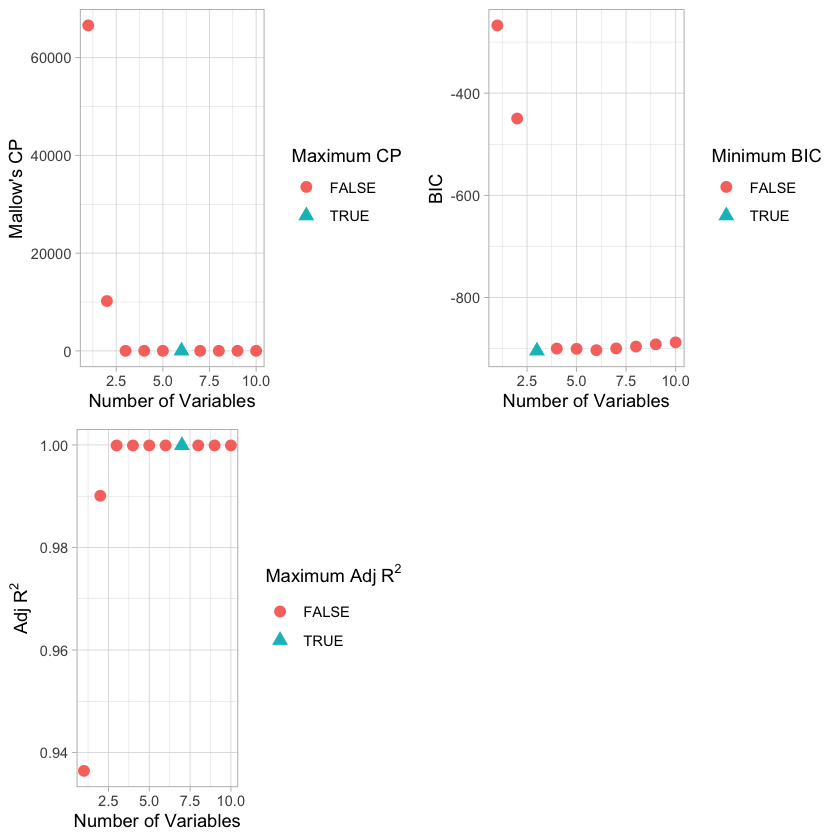

In [ ]:
plot_metrics(backward_summary)
get_text_detail(backward_summary)

c) Compare your results from parts a and b with those of question 1.

> *Write your response here* 
> Best model for Forward selection is the model with 3, x^1, x^2, and x^3 based on the BIC. 

Best model for backward selection is the model with 3, x^1, x^2, and x^3 based on the BIC. 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [102]:
set.seed(2024)
# WRITE YOUR CODE HERE
# 20 features, 1000 observations
n <- 1000
p <- 20

# Generate predictor X with n * p dimension
X <- matrix(rnorm(n * p), n, p)

# Generate beta with some elements/coefficients being zero
beta <- rnorm(p)
# Set 10 random elements to zero
zero_indeces <- sample(p, 10)
beta[zero_indeces] <- 0  

# Generate noise 
e <- rnorm(n)

# Generate response variable
Y <- X %*% beta + e

# Combine predictors and response variable into a data frame
data <- data.frame(X, Y = Y)

# Split into training and test sets
train_indices <- sample(1:n, 100)
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

head(train_data)
head(test_data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
324,-0.67945065,-0.05426635,-0.53807008,-0.1389009,0.05555985,-0.9459978,2.0025974,-0.5135177,0.8600841,-0.3654733,...,-0.01281599,-0.3335702,1.8120009,0.5436841,-0.5323966,-0.6120087,1.3141936,0.02414342,-0.2395830,-2.2957450
181,0.69548203,0.53698466,-0.09490501,0.8311426,0.43753850,-0.8103670,-0.3645100,0.8320629,0.2448513,-0.8888534,...,0.01790104,1.0209617,0.4499409,0.8103964,1.3248273,-1.8183215,-0.5768539,-0.59926314,0.4588769,-0.5061608
595,-0.27653626,-0.20277545,-0.48964098,2.2623399,1.06791788,0.6624159,-0.2357512,0.1577837,-0.5826165,-0.7544496,...,-0.89335196,-1.5950119,-0.9792797,0.6839178,0.6971828,1.4344408,0.7032446,-0.17769696,-0.6216397,1.8579041
34,1.20424904,-1.09012867,2.08591596,-0.4339846,0.44977947,-0.5811705,0.7883874,0.8640876,-0.6728391,0.3369675,...,-0.31267942,-1.2730199,-0.1259061,-1.4367350,1.0892148,-0.3756581,0.8512442,-0.36952000,-1.3483264,-1.6788847
759,-1.19577581,-0.42479911,-1.25638505,-2.1349664,-0.10612787,1.6549464,0.6611401,-0.4805121,0.1683418,-0.9424778,...,1.08720050,0.8934400,-0.9911683,-1.2588477,-1.4166914,-0.2936361,0.3153938,-2.51054459,-1.3880782,-2.0770292
870,0.03705413,0.37471145,0.78395328,0.9086277,-0.33679026,-0.4411275,0.1798622,1.5769007,0.7346208,-0.7750069,...,-0.52352354,1.2898149,-1.9282507,2.0149671,2.4538041,1.2179303,-1.6930166,0.15754101,-0.8470097,-1.3494277


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9819694,-0.05169614,1.0119120,0.001526341,1.0050260,0.68772178,-2.6853467,-0.08403072,0.2281425,-0.64138023,...,0.9055256,2.1579294,-0.3066709,-0.8758251,-0.7697892,-0.9078878,-0.5864909,0.37595403,-0.5992979,-0.06598214
2,0.4687150,-0.49938784,-1.2844115,0.286925442,-0.6163743,0.03796533,-0.6472241,-0.80088083,1.5390481,0.78037558,...,-0.8041793,0.3194702,-0.2873324,0.5267840,0.8273147,1.4560965,0.3380997,-1.07738003,-0.2992445,-2.93880398
3,-0.1079713,-0.90253166,-0.5865616,0.528794534,-1.3975726,-1.26711048,-0.1122397,1.01163476,-0.3293932,0.99958323,...,-0.4248985,-0.4760153,-0.1295187,-1.1873460,0.7905615,1.4505599,0.8902663,0.29479164,-0.7982913,-0.93207707
4,-0.2128782,-0.37196309,-2.3707627,-0.168430430,-2.4063420,0.36475204,0.6219535,0.77497308,0.5598038,-0.06759440,...,0.7639550,2.2261666,1.2002003,-0.1568772,-0.8067472,-0.9970355,0.6668956,0.02350664,1.1986821,1.86224604
5,1.1580985,-0.18843330,-0.3766926,0.166365967,0.6869224,0.34371377,0.2090921,-0.60598589,-0.3858947,0.05351155,...,0.7612121,-0.8653367,1.5153069,-0.5113925,0.8339250,-2.3731123,-1.1470018,-0.70580474,-0.1098079,-0.39979593
6,1.2923548,-0.73661845,-2.0261362,0.861943816,0.7030531,0.47396099,0.9360029,-0.66339591,-0.3548020,-1.84100967,...,1.2945730,-0.1027875,-1.6107252,2.0712993,0.9995348,0.5907844,0.2132962,0.06839134,0.4721248,0.14222791


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

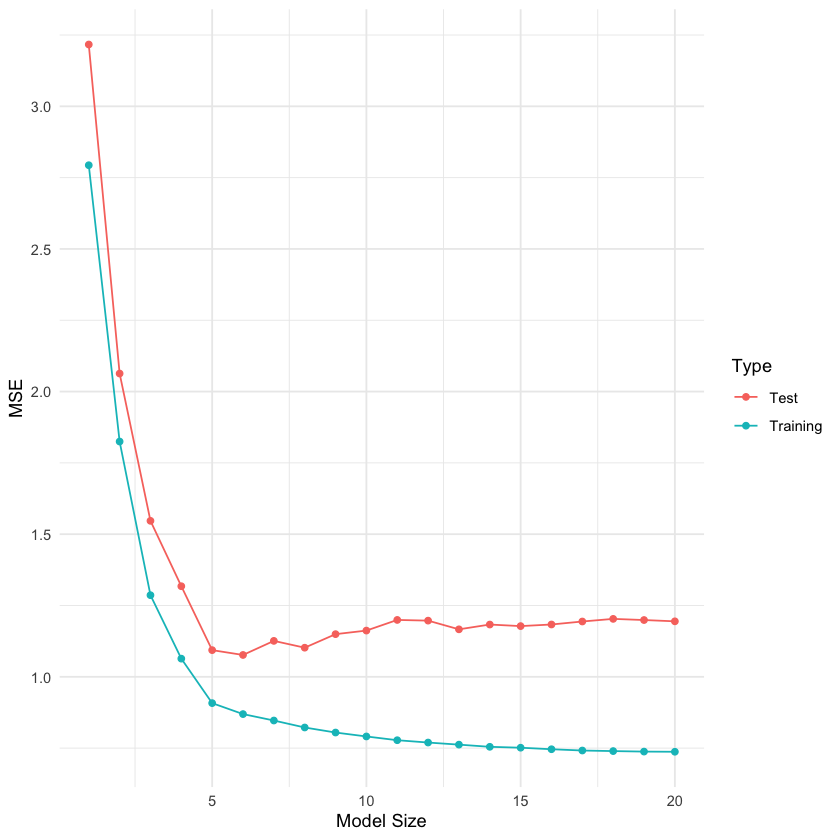

In [109]:
# WRITE YOUR CODE HERE
#  Best subset selection on training set
regfit.best <- regsubsets(Y ~ ., data = train_data, nvmax = p)

# Create vectors to store the training and test set MSE
train_mse <- rep(0, p)
test_mse <- rep(0, p)

# Calculate the training and test set MSE for each model size
for (i in 1:p) {

  coefi <- coef(regfit.best, id = i)

  # Calculate the train set MSE
  model_train <- model.matrix(Y ~ ., data = train_data)
  pred_train <- model_train[, names(coefi)] %*% coefi
  train_mse[i] <- mean((train_data$Y - pred_train)^2)
  
  # Calculate the test set MSE
  model_test <- model.matrix(Y ~ ., data = test_data)
  pred_test <- model_test[, names(coefi)] %*% coefi
  test_mse[i] <- mean((test_data$Y - pred_test)^2)
}

# Create df for plotting
plot_data <- data.frame(
  Size = rep(1:p, 2),
  MSE = c(train_mse, test_mse),
  Type = rep(c("Training", "Test"), each = p)
)

# Create the plot
ggplot(plot_data, aes(x = Size, y = MSE, color = Type)) +
  geom_line() +
  geom_point() +
  labs(x = "Model Size", y = "MSE") +
  theme_minimal()


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [104]:
# Find the size of model with the lowest test_mse
best_model <- which.min(test_mse)

# Get the coefficients of the best model
best_model_coef <- coef(regfit.best, id = best_model)

# Print the size and coefficients of the best model
print(paste("Size of the best model:", best_model))
print("Coefficients of the best model:")
print(best_model_coef)

# List all variables in beta that are non-zero
print("Non-zero coefficients in simulation data:")
print(which(beta != 0))

[1] "Size of the best model: 6"
[1] "Coefficients of the best model:"
(Intercept)          X1          X2          X9         X14         X18 
 -0.1576059   0.2068581   0.4014068  -1.0467877  -0.5547268   0.7832454 
        X20 
  0.9579132 
[1] "Non-zero coefficients in simulation data:"
 [1]  1  2  3  4  9 10 14 18 19 20


In [108]:
zero_indeces

[1] 13 17 12  8  7 11  5 16  6 15

> *Write your response here* 
> The model used to generate the dataset had 20 features. 10 of the coeficients for those feautres were set to 0. Bst subset selection identified 6 variables of the remaining 10 non-zero features to predict Y. 

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name* GPT